In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_pickle('./data/final_df_reducted')


In [2]:
X1 = df[["WindSpeedX", "WindSpeedY", "WindSpeedZ", "ap", "Kp"]]
X2 = df.iloc[:,5:]
X = pd.concat((X2,X1), axis = 1).values

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, int(len(X)*0.8)):
    X_train.append(X[i-60:i, :])
    y_train.append(X[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1], 15))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 15)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 15))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=5,            
                               restore_best_weights=True)  

# Entrenar el modelo con EarlyStopping
regressor.fit(X_train, y_train, 
              epochs=20,                     # Número máximo de épocas
              validation_split=0.2, callbacks=[early_stopping]) 


X_test = list()
y_test = list()
for i in range(int(len(X)*0.8), len(X)-1):
    X_test.append(X[i-60:i, :])
    y_test.append(X[i, :])
X_test, y_test = np.array(X_test), np.array(y_test)
y_pred = regressor.predict(X_test)

Epoch 1/20
342/342 [==============================] - 63s 151ms/step - loss: 0.0101 - val_loss: 0.0044
Epoch 2/20
342/342 [==============================] - 49s 142ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 3/20
342/342 [==============================] - 48s 139ms/step - loss: 0.0047 - val_loss: 0.0039
Epoch 4/20
342/342 [==============================] - 47s 137ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 5/20
342/342 [==============================] - 49s 142ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 6/20
342/342 [==============================] - 50s 145ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 7/20
342/342 [==============================] - 48s 139ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 8/20
342/342 [==============================] - 46s 134ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 9/20
342/342 [==============================] - 48s 141ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 10/20
342/342 [==============================] - 49s 142ms/step - l

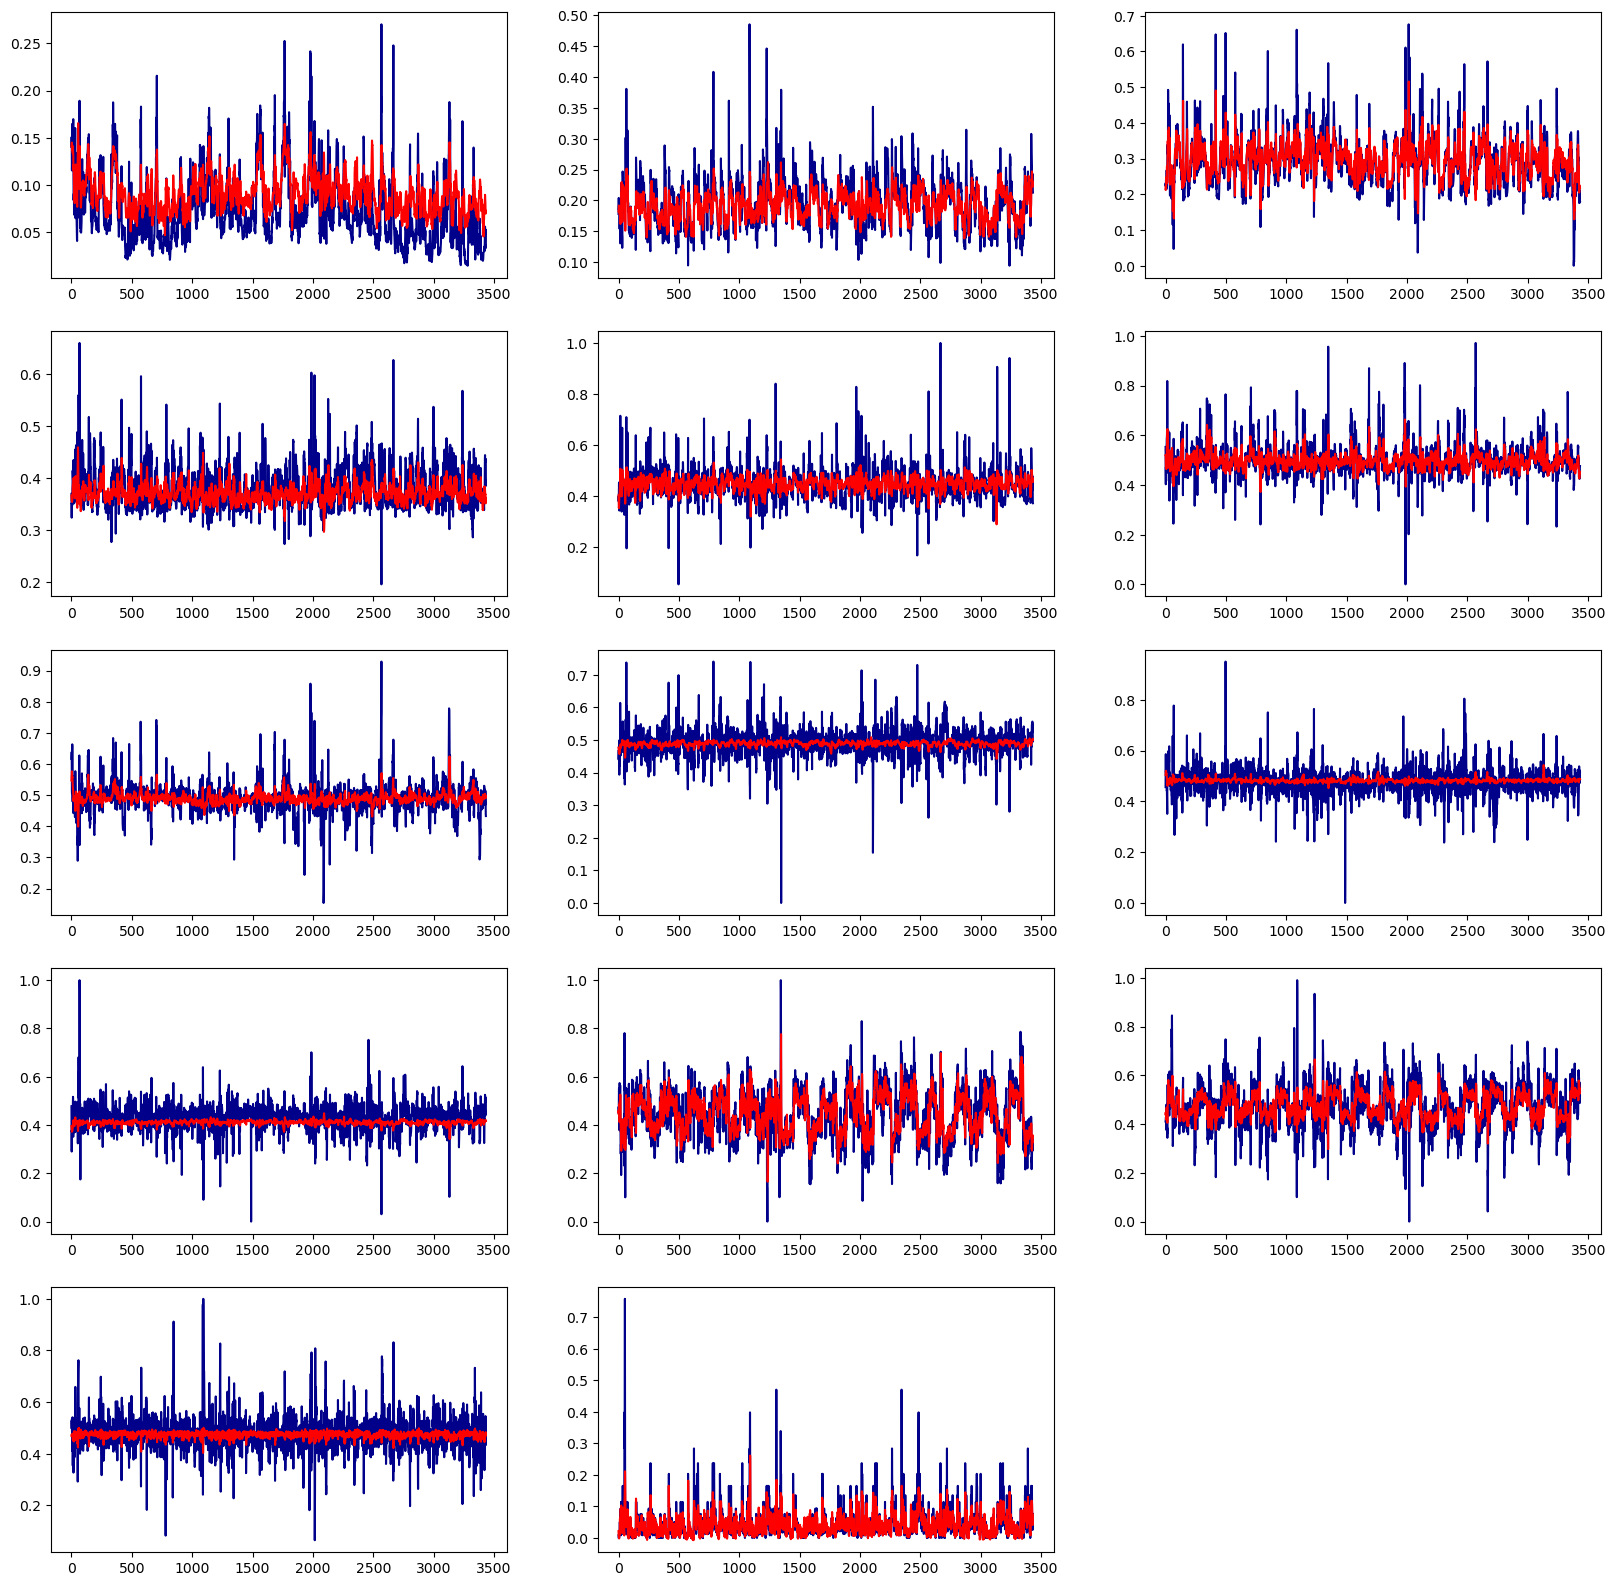

In [4]:
plt.figure(figsize=(20,20))
for j in range(1,15):
    plt.subplot(5,3,j)
    plt.plot(y_test[:,j-1], color = "darkblue")
    plt.plot(y_pred[:,j-1], color = "red")
plt.show()

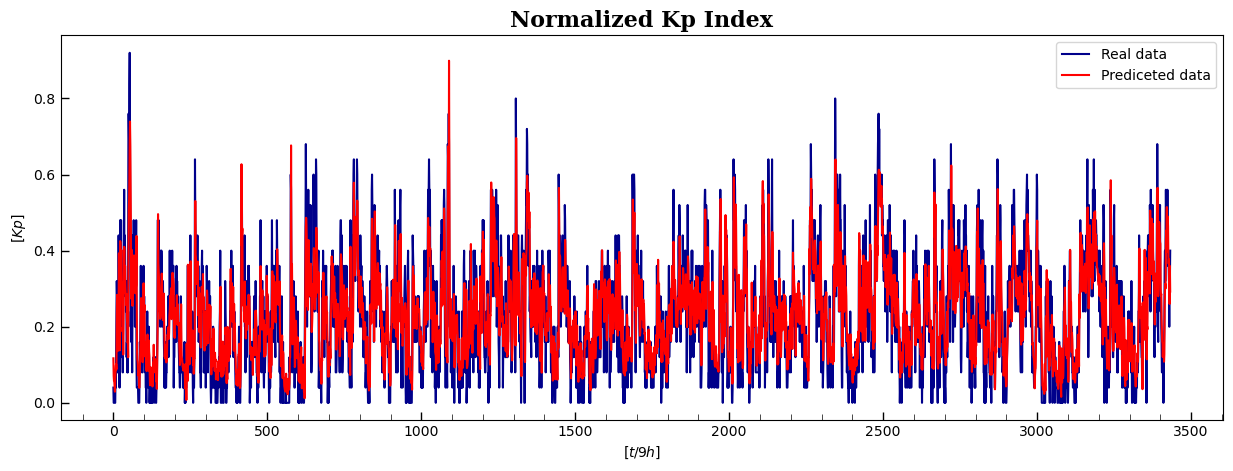

In [22]:
from matplotlib.ticker import MultipleLocator
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(figsize=(15,5))
title_font = FontProperties(family='serif', style='normal', size=16, weight='bold')
ax.set_title('Normalized Kp Index', fontproperties=title_font)
plt.ylabel(r"$[Kp]$")
plt.xlabel(r"$[t/9h]$")
plt.tick_params(axis='both', direction='in', length=6, width=1)
# ax = plt.gca()  # Obtener el objeto del eje actual
minor_locator_x = MultipleLocator(100)  # Ubicación de las subdivisiones en el eje x
ax.xaxis.set_minor_locator(minor_locator_x)
ax.tick_params(axis='x', which='minor', direction='in', length=4, width=0.5)
minor_locator_y = MultipleLocator(20)  # Ubicación de las subdivisiones en el eje y
ax.yaxis.set_minor_locator(minor_locator_y)
ax.tick_params(axis='y', which='minor', direction='in', length=4, width=0.5)


plt.plot(y_test[:,14], color = "darkblue", label = "Real data", linestyle = "-")
plt.plot(y_pred[:,14], color = "red", label = "Prediceted data")

plt.legend()
plt.show()